<a href="https://colab.research.google.com/github/PriyaShah-79/Codec-Technologies-Internship/blob/main/Handwritten%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8149 - loss: 0.6930 - val_accuracy: 0.9635 - val_loss: 0.1346
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9610 - loss: 0.1395 - val_accuracy: 0.9773 - val_loss: 0.0849
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9761 - loss: 0.0875 - val_accuracy: 0.9818 - val_loss: 0.0692
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9809 - loss: 0.0686 - val_accuracy: 0.9857 - val_loss: 0.0590
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9830 - loss: 0.0572 - val_accuracy: 0.9828 - val_loss: 0.0623
Test Accuracy: 0.9796
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


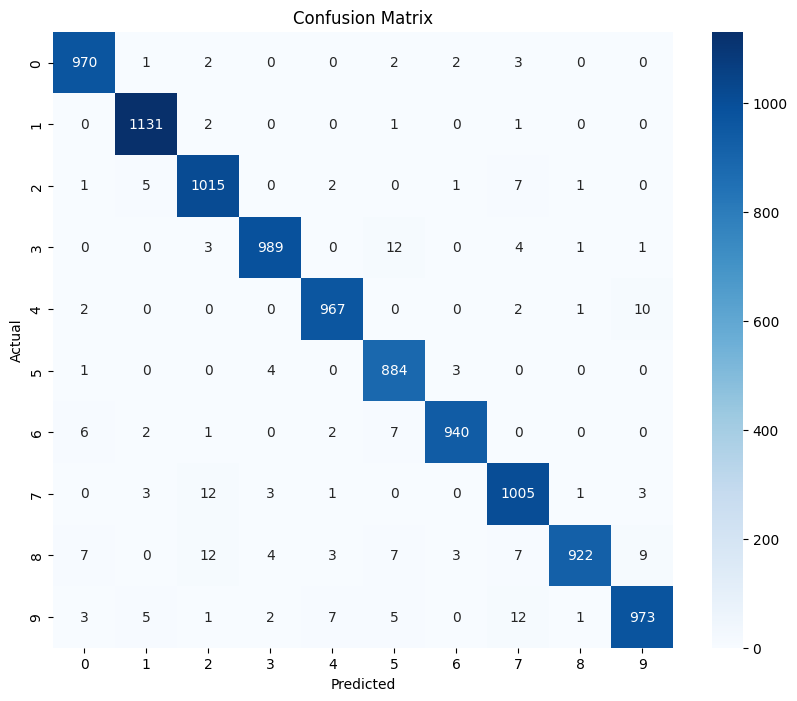

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

# 1. Load and Preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] and reshape to (28, 28, 1) for grayscale
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# 2. Build the CNN Model
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax"), # 10 output classes for digits 0-9
])

# 3. Compile and Train
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# 4. Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {score[1]:.4f}")

# 5. Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()